In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import tensorflow
from sklearn.preprocessing import OrdinalEncoder

In [3]:
df = pd.read_csv(r"C:\Users\khlds\Downloads\archive (1)\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [4]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)


In [5]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [6]:
df.isna().sum()

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
print(df["Geography"].mode()[0])
print(df["Age"].median())
print(df["HasCrCard"].median())
print(df["IsActiveMember"].median())

France
37.0
1.0
1.0


In [8]:
df["Geography"] = df["Geography"].fillna(df["Geography"].mode()[0])
df["Age"]= df["Age"].fillna(df["Age"].median())
df["HasCrCard"]=df["HasCrCard"].fillna(df["HasCrCard"].median())
df["IsActiveMember"] = df["IsActiveMember"].fillna(df["IsActiveMember"].median())

In [9]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.922903,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487128,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


0    7963
1    2037
Name: Exited, dtype: int64


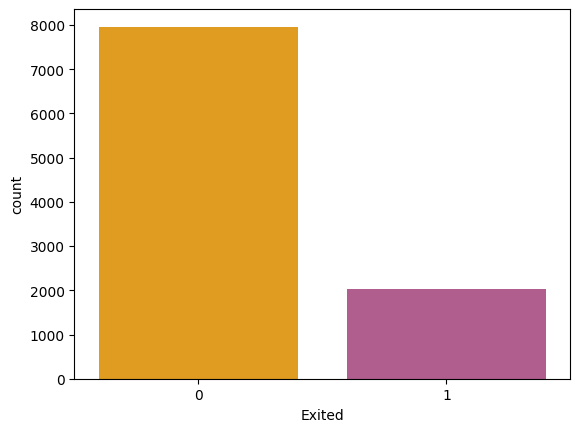

In [11]:
cols=["#ffa600","#bc5090"]
sns.countplot(x=df["Exited"],palette=cols)
print(df["Exited"].value_counts())


In [12]:
df = pd.read_csv(r"C:\Users\khlds\Downloads\archive (1)\Churn_Modelling.csv")

df = df.drop(df.index[0])

exited = df[df['Exited'] == 1]

not_exited = df[df['Exited'] == 0]

n_not_exited = len(not_exited)

exited_upsampled = exited.sample(n_not_exited, replace=True)

df_upsampled = pd.concat([exited_upsampled, not_exited])

df = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

df.to_csv('cleaned_data.csv', index=False)

In [13]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,8724,15803202,Onyekachi,350,France,Male,51.0,10,0.00,1,1.0,1.0,125823.79,1
1,5059,15682322,Aksenov,714,France,Male,37.0,9,148466.93,2,0.0,1.0,151280.96,0
2,9070,15777459,Gordon,619,Spain,Female,32.0,4,175406.13,2,1.0,1.0,172792.43,1
3,998,15608114,Manfrin,587,Spain,Male,62.0,7,121286.27,1,0.0,1.0,6776.92,0
4,2176,15769254,Tuan,757,Germany,Female,34.0,9,101861.36,2,0.0,0.0,187011.96,0


1    7964
0    7964
Name: Exited, dtype: int64


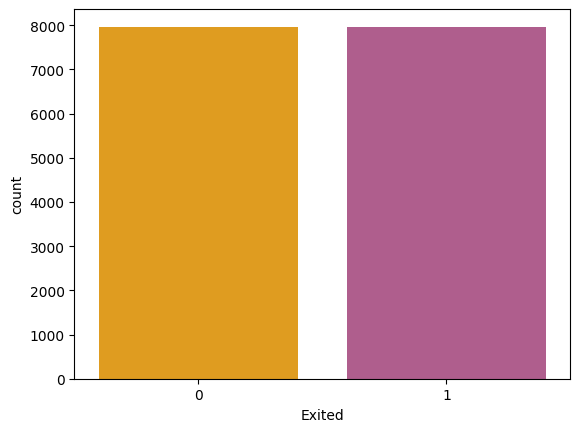

In [14]:
cols=["#ffa600","#bc5090"]
sns.countplot(x=df["Exited"],palette=cols)
print(df["Exited"].value_counts())

In [17]:
df_new = df.copy()
a = ["Geography","Gender"] 
en_ = OrdinalEncoder()     
df_new[a] = en_.fit_transform(df_new[a])